In [1]:
# Import libraries
import pandas as pd
from ast import literal_eval
from itertools import chain
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from statistics import mode
from nltk import FreqDist

In [2]:
# Load data with keeping structures inside data frame
songs = pd.read_csv('lyrics_processed_data.csv', converters={'Tokenized Lyrics': literal_eval, 'Lemmatized Words': literal_eval, 'Parts of Speech': literal_eval, 'Adjectives': literal_eval, 'Nouns': literal_eval, 'Adverbs': literal_eval, 'Pronouns': literal_eval, 'Verbs': literal_eval,})
display(songs)

,Position,Artist,Song Title,Year,JSON file,Split Names,Song Language,Lyrics,Cleaned Lyrics,Tokenized Lyrics,Lemmatized Words,Parts of Speech,Adjectives,Nouns,Adverbs,Pronouns,Verbs
0,1,Gordon Jenkins and The Weavers,Goodnight Irene,1950,0.json,Gordon Jenkins,en,irene goodnight irene goodnight goodnight iren...,irene goodnight irene goodnight goodnight iren...,"[irene, goodnight, irene, goodnight, goodnight...","[irene, goodnight, irene, goodnight, goodnight...","[(irene, NN), (goodnight, VBD), (irene, JJ), (...","[irene, goodnight, last, saturday, im, irene, ...","[irene, goodnight, irene, irene, ill, dream, n...","[down, now, sometimes, sometimes, sometimes, l...","[you, me, me, you, you, you, you]","[take, jump, stop, stop]"
1,2,Nat King Cole,Mona Lisa,1950,1.json,Nat King Cole,en,mona lisa mona lisa men have named you youre s...,mona lisa mona lisa men named youre like lady ...,"[mona, lisa, mona, lisa, men, have, named, you...","[mona, lisa, mona, lisa, men, have, named, you...","[(mona, NN), (lisa, NN), (mona, NN), (lisa, VB...","[mystic, broken, many, warm, real, mona, cold,...","[mona, lisa, mona, lady, smile, youre, mona, s...","[so, only, lonely, just, there, just, lonely, ...","[you, it, they, you, you, they, they, you, you...","[smile, tempt, hide, lie, smile, tempt, hide, ..."
2,4,Gary and Bing Crosby,Sam's Song,1950,3.json,Gary,en,ah heres a happy tune youll love to croon they...,ah heres happy tune youll love croon call sams...,"[ah, heres, a, happy, tune, youll, love, to, c...","[ah, here, a, happy, tune, youll, love, to, cr...","[(ah, NN), (here, RB), (a, DT), (happy, JJ), (...","[happy, song, youre, grim, grand, smile, wrong...","[ah, tune, youll, love, song, melody, nothing,...","[here, then, only, soon, so, never, ah, here, ...","[they, it, it, they, it, you, it, you, you, yo...","[croon, call, be, make, get, do, agree, forget..."
3,5,Gary and Bing Crosby,Simple Melody,1950,4.json,Gary,en,wont you play some simple melody like my mothe...,wont play simple melody like mother sang one g...,"[wont, you, play, some, simple, melody, like, ...","[wont, you, play, some, simple, melody, like, ...","[(wont, NN), (you, PRP), (play, VBP), (some, D...","[simple, good, old, simple, musical, classical...","[wont, melody, mother, sang, harmony, melody, ...","[just, simply, na, just, simply, na, just, sim...","[you, me, you, me, you, you, me, you, you, me,...","[play, play, rag, play, rag, play, rag, rag, r..."
4,6,Teresa Brewer,"Music, Music, Music",1950,5.json,Teresa Brewer,en,put another nickel in in the nickelodeon all i...,put another nickel nickelodeon want music musi...,"[put, another, nickel, in, in, the, nickelodeo...","[put, another, nickel, in, in, the, nickelodeo...","[(put, VB), (another, DT), (nickel, NN), (in, ...","[youd, dear, youd, dear, old]","[nickel, nickelodeon, i, music, music, music, ...","[danciong, close, so, danciong, close, so]","[you, you, me, you, me, you, you, you, me, you...","[put, keep]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,96,Morgan Wallen,More Than My Hometown,2020,6675.json,Morgan Wallen,en,girl our mamas are best friends and so are we ...,girl mamas best friends whole towns rooting us...,"[girl, our, mamas, are, best, friends, and, so...","[girl, our, mama, are, best, friend, and, so, ...","[(girl, VB), (our, PRP$), (mama, NN), (are, VB...","[whole, likely, few, real, deep, em, real, spi...","[mama, friend, town, u, home, team, plant, roo...","[so, just, twentyone, yet, twentyone, yet, jus...","[we, we, you, you, you, you, you, you, you, yo...","[girl, settle, let, grow, stop, go, i, need, k..."
6298,97,Luke Combs,Lovin' On You,2020,6676.json,Luke Combs,en,dont get me wrong i like a bobber on the water...,get wrong like bobber water hookin em reelin e...,"[dont, get, me, wrong, i, like, a, bobber, on,...","[dont, get, me, wrong, i, like, a, bobber, on,...","[(dont, NN), (get, VB), (me, PRP), (wrong, JJ)...","[wrong, friday, rewind, strong, enough, 

<AxesSubplot:title={'center':"Count received songs' lyrics per year"}, xlabel='Year'>

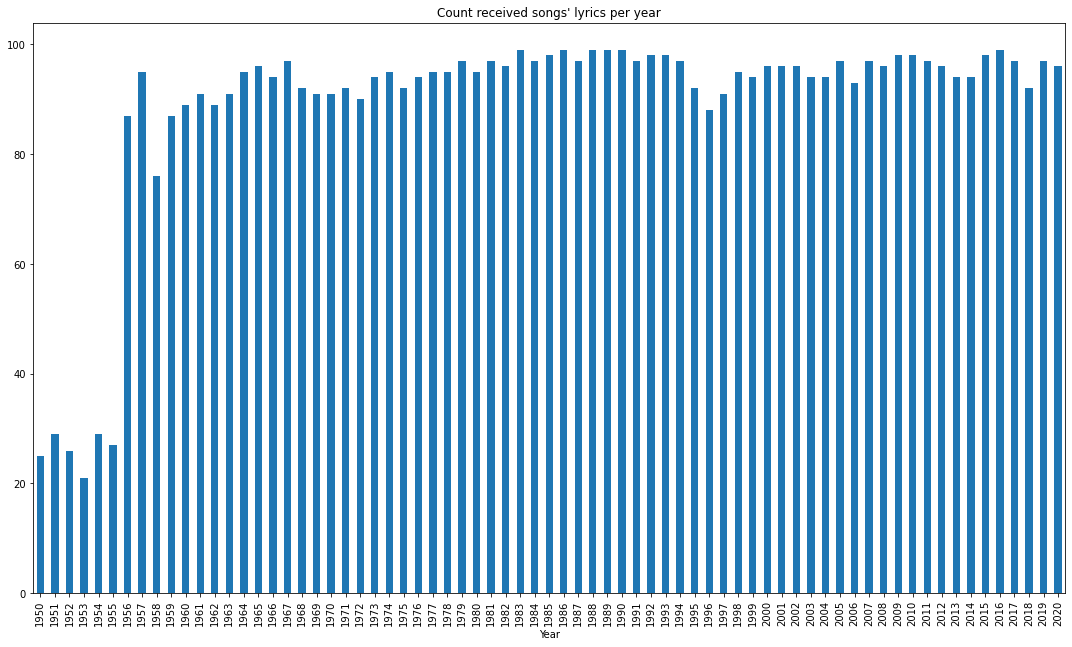

In [3]:
# Count received songs' lyrics per year
songs.groupby('Year').count().plot(y = 'Song Title', kind = 'bar', figsize = (18.5, 10.5), legend = False, title = 'Count received songs\' lyrics per year')

<AxesSubplot:xlabel='Year'>

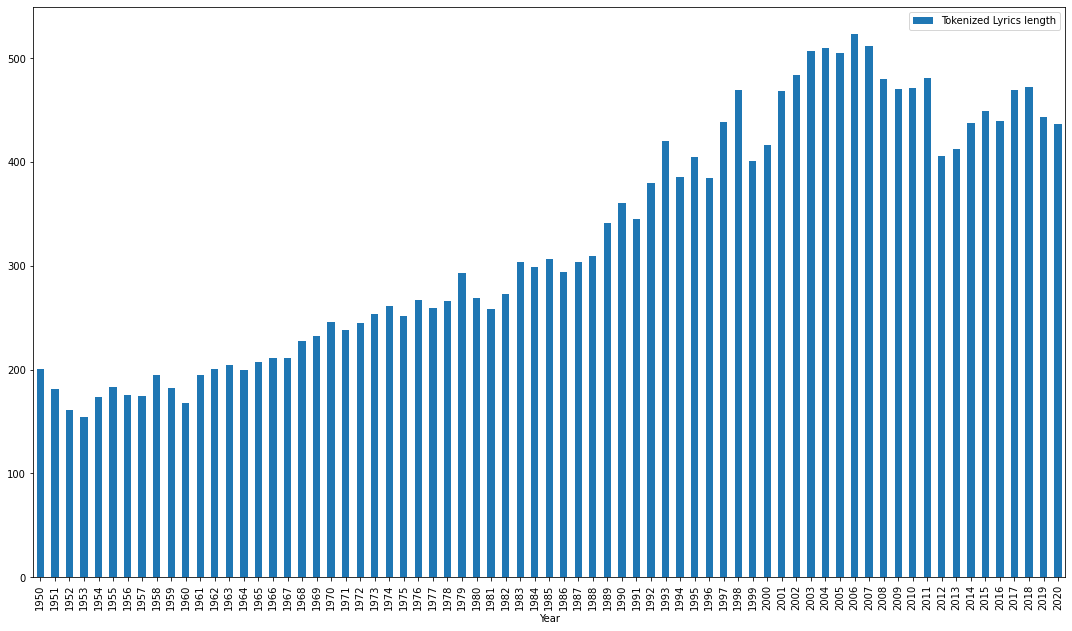

In [4]:
# Mean amount of words in lyrics
songs['Tokenized Lyrics length'] = songs['Tokenized Lyrics'].str.len()
songs.groupby('Year').mean('Tokenized Lyrics length').plot(y = 'Tokenized Lyrics length', kind = 'bar', figsize = (18.5, 10.5))

<AxesSubplot:xlabel='Year'>

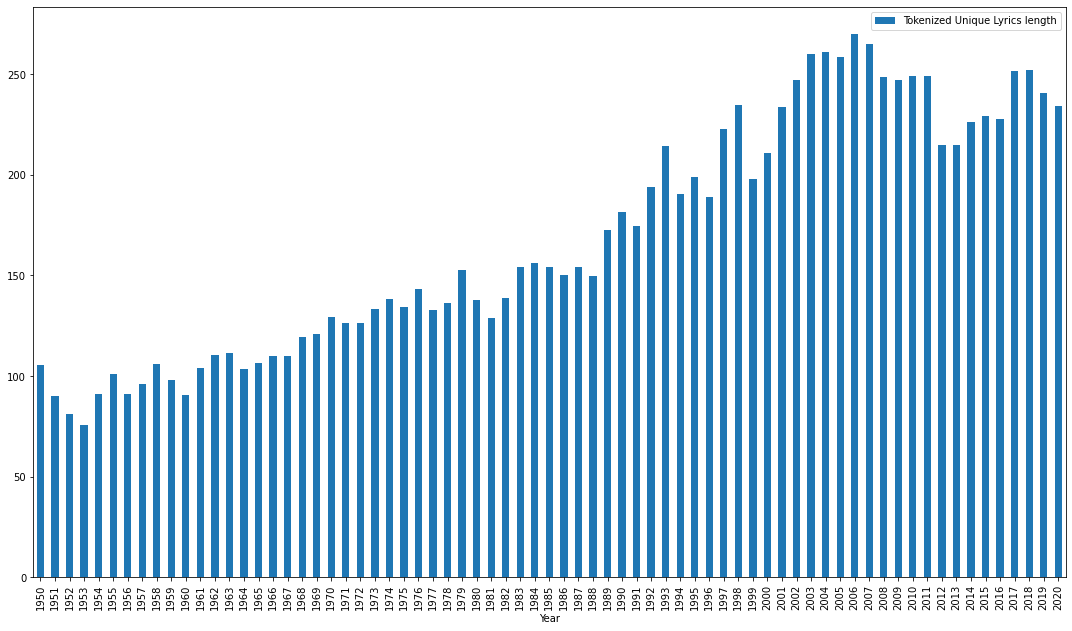

In [5]:
# Mean amount of unique words in lyrics
songs['Tokenized Unique Lyrics length'] = songs['Cleaned Lyrics'].str.split().str.len()
songs.groupby('Year').mean('Tokenized Unique Lyrics length').plot(y = 'Tokenized Unique Lyrics length', kind = 'bar', figsize = (18.5, 10.5))

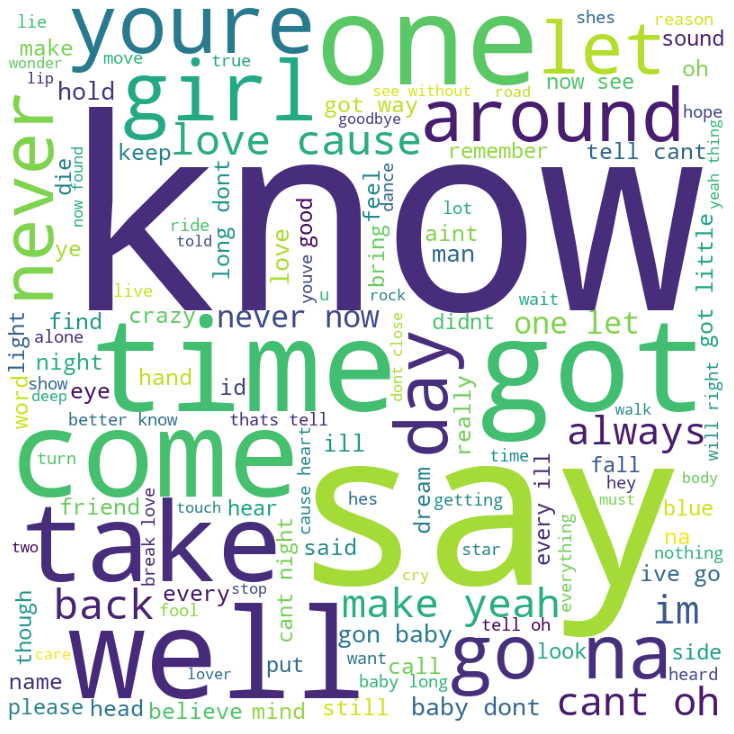

In [6]:
# Word cloud
set_lyrics = [set(i) for i in songs['Tokenized Lyrics']]
set_lyrics = list(chain(*set_lyrics))
join_lyrics = (" ").join(set_lyrics)

STOPWORDS.add('n\'t')

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 15).generate(join_lyrics)
plt.figure(figsize = (18.5, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [7]:
# The most popular word each year
most_popular_word_per_year = pd.DataFrame({'Year':list(range(1950, 2021))})
lyrics_per_year = []

# Function for converting lists to sets
def lists_to_sets(l):
    return [{i for i in row} for row in l]

# Combination of lyrics per year
for i in list(songs['Year'].unique()):
    song_lyrics = songs['Cleaned Lyrics'].str.split()[songs['Year'] == i].to_list()
    set_song_lyrics = lists_to_sets(song_lyrics)
    flat_song_lyrics = [item for i in set_song_lyrics for item in i]
    lyrics_per_year.append(flat_song_lyrics)
    
# Set for every song in particular year
most_popular_word_per_year['Combined Lyrics'] = lyrics_per_year

most_popular_word_per_year['Most Popular Word'] = [mode(i) for i in most_popular_word_per_year['Combined Lyrics']]

display(most_popular_word_per_year)

# most_popular_word_per_year['Most Popular Word'] = [mode(i) for i.most_common(1)[0][0] in FreqDist(most_popular_word_per_year['Combined Lyrics'])]

,Year,Combined Lyrics,Most Popular Word
0,1950,"[sometimes, ill, bright, country, ramblin, dre...",love
1,1951,"[heard, weve, last, may, go, try, love, recall...",love
2,1952,"[day, ill, turning, goes, arrow, somehow, let,...",love
3,1953,"[always, darling, sad, kiss, may, wont, break,...",love
4,1954,"[always, day, warmth, diamonds, bright, cost, ...",love
...,...,...,...
66,2016,"[anyone, hold, movin, didnt, friends, let, low...",know
67,2017,"[friends, one, let, slow, fill, mind, kiss, bo...",like
68,2018,"[since, hold, movin, sometimes, 40, things, ma...",like
69,2019,"[porsche, kio, ride, road, ask, cheated, wrang...",yeah
